In [1]:
import numpy as np
from sklearn.linear_model import RidgeClassifierCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

import pandas as pd
from sktime.datasets import load_arrow_head  # univariate dataset
from sktime.datasets.base import load_japanese_vowels  # multivariate dataset
from sktime.transformations.panel.rocket import Rocket, MiniRocketMultivariate

from noise import decompress_pickle
INPUT_DATA_PATH = '../input-data/'
MODEL_PATH = './models/'
data = decompress_pickle(INPUT_DATA_PATH + 'cycle_data')
import pickle

In [9]:
signal, cycle = 'i', 'cycle_1'
X_train = decompress_pickle(INPUT_DATA_PATH + f'folds/{signal}/{cycle}/X_train')
X_val = decompress_pickle(INPUT_DATA_PATH + f'folds/{signal}/{cycle}/X_val')

In [5]:
X_train.shape

(752, 4)

In [6]:
X_val.shape

(188, 4)

In [8]:
752 + 188

940

In [10]:
752 / 940

0.8

In [11]:
188 / 940

0.2

In [12]:
X_train_flavio = decompress_pickle(INPUT_DATA_PATH + f'folds/{signal}/{cycle}/X_train')
X_val_flavio = decompress_pickle(INPUT_DATA_PATH + f'folds/{signal}/{cycle}/X_val')
X_train_robson = decompress_pickle(INPUT_DATA_PATH + f'folds-robson/{signal}/{cycle}/X_train')
X_val_robson = decompress_pickle(INPUT_DATA_PATH + f'folds-robson/{signal}/{cycle}/X_val')
X_train = pd.concat([X_train_flavio, X_train_robson]).reset_index(drop=True)
X_val = pd.concat([X_val_flavio, X_val_robson]).reset_index(drop=True)

In [14]:
940 * 2

1880

In [18]:
X_train.shape[0]

1504

In [19]:
X_val.shape[0]

376

In [14]:
with open(MODEL_PATH + 'minirocket_cycle_128.pkl', 'rb') as f:
    trans = pickle.load(f)

In [15]:
trans

MiniRocketMultivariate(random_state=42)

In [8]:
trans.num_features

10000

In [9]:
with open(MODEL_PATH + 'rocket_cycle_128.pkl', 'rb') as f:
    trans = pickle.load(f)

In [10]:
trans.num_kernels

10000

In [16]:
isinstance(trans, MiniRocketMultivariate)

True

In [11]:
trans

Rocket(random_state=42)

In [2]:
def format_dataframe(data):
    cols = int(data.shape[0] / 4)
    shaped_data = data.reshape((4, cols)).T
    s1 = pd.Series(shaped_data[:, 0])
    s2 = pd.Series(shaped_data[:, 1])
    s3 = pd.Series(shaped_data[:, 2])
    s4 = pd.Series(shaped_data[:, 3])
    dicio = {'A': [], 'B': [], 'C': [], 'Z': []}
    dicio['A'].append(s1)
    dicio['B'].append(s2)
    dicio['C'].append(s3)
    dicio['Z'].append(s4)
    return pd.DataFrame(dicio)

In [3]:
data[0].keys()

dict_keys(['fault_type', 'fault_type_one_hot', 'distance', 'angle', 'resistance', 'v_noise', 'i_noise', 'i_cycle_1', 'v_cycle_1', 'i_cycle_2', 'v_cycle_2', 'i_cycle_4', 'v_cycle_4', 'i_cycle_8', 'v_cycle_8', 'i_cycle_16', 'v_cycle_16', 'i_cycle_32', 'v_cycle_32', 'i_cycle_64', 'v_cycle_64', 'i_cycle_128', 'v_cycle_128'])

In [8]:
format_dataframe(data[0]['i_cycle_1'])['A'].values[0]

0     -563.850750
1     -557.367775
2     -552.339468
3     -546.579817
4     -539.532531
          ...    
315     74.983533
316     70.845566
317     64.531654
318     62.008877
319     68.164591
Length: 320, dtype: float64

In [20]:
int(data[0]['i_cycle_1'].shape[0] / 4)

320

In [21]:
data[0]['i_cycle_1'].reshape((4, 320)).T.shape

(320, 4)

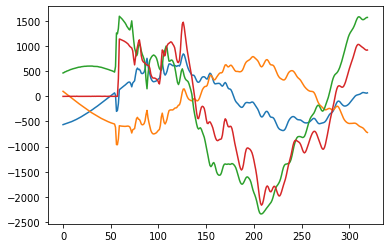

In [22]:
import matplotlib.pyplot as plt
plt.plot(data[0]['i_cycle_1'].reshape((4, 320)).T[:,0])
plt.plot(data[0]['i_cycle_1'].reshape((4, 320)).T[:,1])
plt.plot(data[0]['i_cycle_1'].reshape((4, 320)).T[:,2])
plt.plot(data[0]['i_cycle_1'].reshape((4, 320)).T[:,3]);

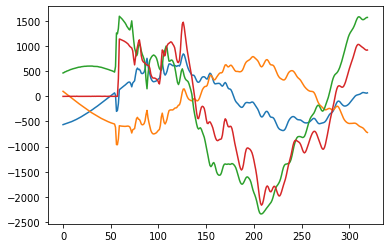

In [19]:
import matplotlib.pyplot as plt
plt.plot(data[0]['i_cycle_1'][:320])
plt.plot(data[0]['i_cycle_1'][320:640])
plt.plot(data[0]['i_cycle_1'][640:960])
plt.plot(data[0]['i_cycle_1'][960:]);

In [3]:
data_list = []
target_list = []
for d in data:
    data_list.append(format_dataframe(d['i_cycle_1']))
    target_list.append(d['fault_type'])
X = pd.concat(data_list).reset_index(drop=True)
y = np.array(target_list)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train.shape

(752, 4)

In [6]:
X_test.shape

(188, 4)

In [7]:
# https://github.com/alan-turing-institute/sktime/blob/main/examples/rocket.ipynb

rocket = Rocket()
rocket.fit(X_train)
X_train_transform = rocket.transform(X_train)

In [9]:
X_train.shape

(752, 4)

In [11]:
X_train.head()

,A,B,C,Z
82,0 -582.708750 1 -571.753996 2 -570...,0 140.154819 1 123.678615 2 114...,0 436.055818 1 446.137520 2 455...,0 0.000014 1 -0.000001 2 0.00001...
931,0 208.049877 1 193.303383 2 181...,0 384.130442 1 396.363198 2 408...,0 -593.188373 1 -589.995252 2 -586...,0 0.514435 1 -0.535060 2 -0...
741,0 3.491071 1 -9.564796 2 ...,0 518.179829 1 526.564120 2 533...,0 -523.511894 1 -517.271818 2 -508...,0 -0.015318 1 -0.284316 2 0...
926,0 398.349542 1 384.287639 2 ...,0 193.140830 1 208.038311 2 ...,0 -589.787578 1 -593.042055 2 -595...,0 -0.000021 1 -0.000027 2 -0.00002...
877,0 137.909108 1 122.487959 2 107...,0 438.763533 1 449.113664 2 459...,0 -574.725971 1 -570.478520 2 -...,0 -0.321762 1 0.180104 2 0...


In [12]:
X_train.loc[0, 'A']

0     -563.850750
1     -557.367775
2     -552.339468
3     -546.579817
4     -539.532531
          ...    
315     74.983533
316     70.845566
317     64.531654
318     62.008877
319     68.164591
Length: 320, dtype: float64

In [10]:
X_train_transform.shape

(752, 20000)

In [14]:
X_train_transform.head()

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
0,0.521875,4.794999,0.518750,3.942405,0.037500,0.691111,0.243333,0.240267,0.437500,3.547817,...,0.468750,1.338816,0.571875,3.234033,0.264516,2.996075,0.481481,1.467149,1.000000,1.447355
1,0.500000,2.707144,0.518750,4.372274,0.143750,0.953433,0.336667,1.320862,0.604167,3.006728,...,0.515625,1.640704,0.687500,2.808795,0.219355,1.086669,0.488889,1.946501,0.920000,1.989119
2,0.437500,3.811584,0.478125,3.084146,0.215625,1.074154,0.270000,0.931491,0.587500,2.202686,...,0.531250,1.231082,0.612500,2.874702,0.245161,1.935311,0.470370,2.186999,0.970000,1.681532
3,0.490625,3.743568,0.490625,6.537870,0.287500,1.182461,0.270000,0.804977,0.583333,3.864292,...,0.340625,1.630284,0.737500,4.004393,0.306452,3.262026,0.496296,1.511763,0.963333,1.525433
4,0.584375,1.408591,0.459375,3.711622,0.065625,0.418191,0.323333,0.954566,0.591667,2.241249,...,0.428125,1.217808,0.596875,3.396448,0.225806,2.705039,0.488889,1.814690,0.976667,1.772314


In [15]:
classifier = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10), normalize=True)
classifier.fit(X_train_transform, y_train)

RidgeClassifierCV(alphas=array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                  normalize=True)

In [16]:
X_test_transform = rocket.transform(X_test)

In [17]:
classifier.score(X_test_transform, y_test)

1.0

In [18]:
# https://github.com/alan-turing-institute/sktime/blob/main/examples/minirocket.ipynb

minirocket = MiniRocketMultivariate()   
minirocket.fit(X_train)
X_train_transform = rocket.transform(X_train)

In [19]:
classifier = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10), normalize=True)
classifier.fit(X_train_transform, y_train)

RidgeClassifierCV(alphas=array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                  normalize=True)

In [20]:
X_train_transform.shape

(752, 20000)

In [21]:
X_train_transform.head()

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
0,0.521875,4.794999,0.518750,3.942405,0.037500,0.691111,0.243333,0.240267,0.437500,3.547817,...,0.468750,1.338816,0.571875,3.234033,0.264516,2.996075,0.481481,1.467149,1.000000,1.447355
1,0.500000,2.707144,0.518750,4.372274,0.143750,0.953433,0.336667,1.320862,0.604167,3.006728,...,0.515625,1.640704,0.687500,2.808795,0.219355,1.086669,0.488889,1.946501,0.920000,1.989119
2,0.437500,3.811584,0.478125,3.084146,0.215625,1.074154,0.270000,0.931491,0.587500,2.202686,...,0.531250,1.231082,0.612500,2.874702,0.245161,1.935311,0.470370,2.186999,0.970000,1.681532
3,0.490625,3.743568,0.490625,6.537870,0.287500,1.182461,0.270000,0.804977,0.583333,3.864292,...,0.340625,1.630284,0.737500,4.004393,0.306452,3.262026,0.496296,1.511763,0.963333,1.525433
4,0.584375,1.408591,0.459375,3.711622,0.065625,0.418191,0.323333,0.954566,0.591667,2.241249,...,0.428125,1.217808,0.596875,3.396448,0.225806,2.705039,0.488889,1.814690,0.976667,1.772314


In [13]:
classifier.score(X_test_transform, y_test)

0.9893617021276596

In [14]:
# https://github.com/alan-turing-institute/sktime/blob/main/examples/03_classification_multivariate.ipynb

from sklearn.pipeline import Pipeline

from sktime.classification.compose import ColumnEnsembleClassifier
from sktime.classification.dictionary_based import BOSSEnsemble
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.classification.shapelet_based import MrSEQLClassifier
from sktime.datasets import load_basic_motions
from sktime.transformations.panel.compose import ColumnConcatenator

steps = [
    ("concatenate", ColumnConcatenator()),
    ("classify", TimeSeriesForestClassifier(n_estimators=100)),
]
clf = Pipeline(steps)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9893617021276596

In [1]:
from noise import compressed_pickle
from sklearn.model_selection import StratifiedKFold

In [2]:
def open_data(signal_type, cycle_name):
    data_list = []
    target_list = []
    for d in data:
        data_list.append(format_dataframe(d[f'{signal_type}_{cycle_name}']))
        target_list.append(d['fault_type'])
    X = pd.concat(data_list).reset_index(drop=True)
    y = np.array(target_list)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    compressed_pickle(INPUT_DATA_PATH + f'folds/{signal_type}/{cycle_name}/' + 'X_test', X_test)
    compressed_pickle(INPUT_DATA_PATH + f'folds/{signal_type}/{cycle_name}/' + 'y_test', y_test)
    return X_train, y_train

In [3]:
def save_folds(signal_type, cycle_name):
    X_train, y_train = open_data(signal_type, cycle_name)
    data_folds_path = INPUT_DATA_PATH + f'folds/{signal_type}/{cycle_name}/'
    kf = StratifiedKFold(n_splits=10)
    fold = 0
    for tr, te in kf.split(X_train, y_train):
        fold += 1
        X_tr, X_te = X_train.iloc[tr, :], X_train.iloc[te, :]
        y_tr, y_te = y_train[tr], y_train[te]
        compressed_pickle(data_folds_path + f'X_train_fold_{fold}', X_tr)
        compressed_pickle(data_folds_path + f'X_test_fold_{fold}', X_te)
        compressed_pickle(data_folds_path + f'y_train_fold_{fold}', y_tr)
        compressed_pickle(data_folds_path + f'y_test_fold_{fold}', y_te)

In [8]:
cycle_list = ['cycle_1', 'cycle_2', 'cycle_4', 'cycle_8', 'cycle_16', 'cycle_32']

for cycle_name in cycle_list:
    save_folds('v', cycle_name)
    save_folds('i', cycle_name)